In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
iris = pd.read_csv('Iris.csv')

In [296]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [297]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [298]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Data set is Balanced data Set

In [299]:
iris.duplicated().sum()

0

In [300]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


By looking the statistic summary we can say that the data is a quality data

In [301]:
dummies = pd.get_dummies(iris['Species'])

In [303]:
iris.drop('Id',axis=1,inplace=True)

In [304]:
iris_final = pd.concat([pd.get_dummies(iris['Species']),iris.iloc[:,[0,1,2,3]]],axis=1)

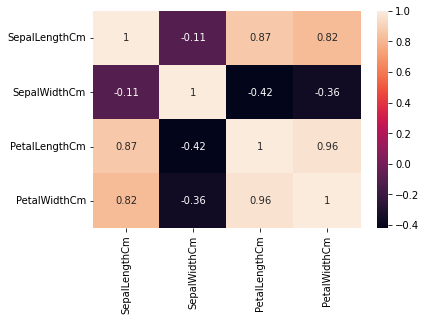

In [305]:
sns.heatmap(iris.corr(),annot=True)

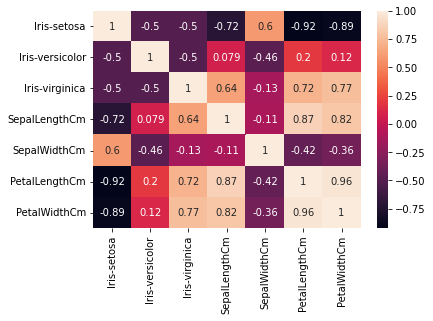

In [306]:
sns.heatmap(iris_final.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


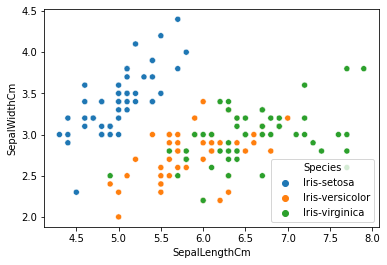

In [307]:
sns.scatterplot(iris['SepalLengthCm'], iris['SepalWidthCm'], hue = iris['Species'])

1. Taking this two variable into consideration we can see that sepal width of setosa is larger and sepal length is small compared to other two

2. We can separate setosa from other two

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


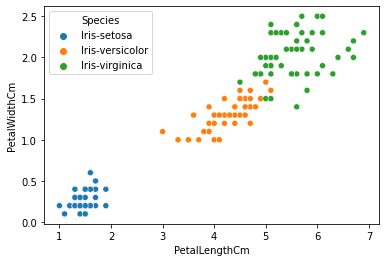

In [308]:
sns.scatterplot(iris['PetalLengthCm'], iris['PetalWidthCm'], hue = iris['Species'])

1. We can easily separate setosa from other two using this variables

2. Setosa has small petal length and petal width compared to other two, virginica has the largest petal length and width

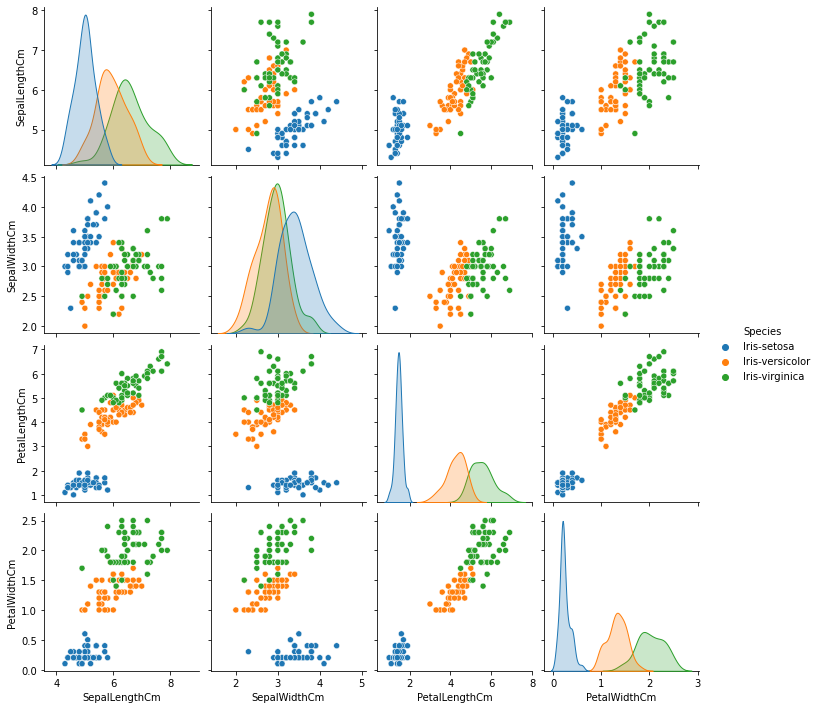

In [309]:
sns.pairplot(iris,hue = 'Species',diag_kind='kde')

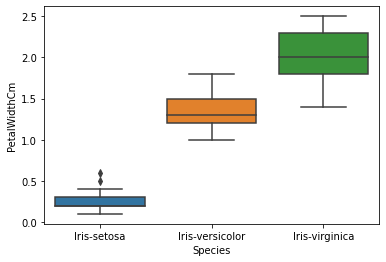

In [310]:
sns.boxplot(x=iris['Species'],y=iris['PetalWidthCm'])

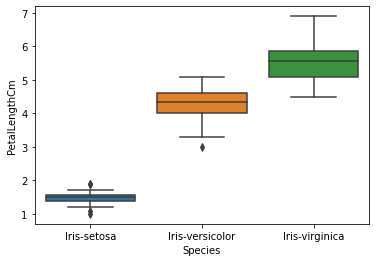

In [311]:
sns.boxplot(x=iris['Species'],y=iris['PetalLengthCm'])

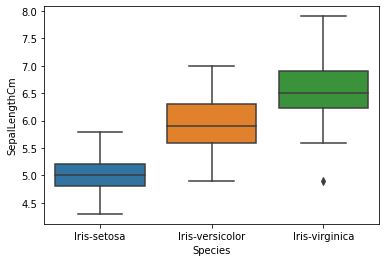

In [312]:
sns.boxplot(x=iris['Species'],y=iris['SepalLengthCm'])

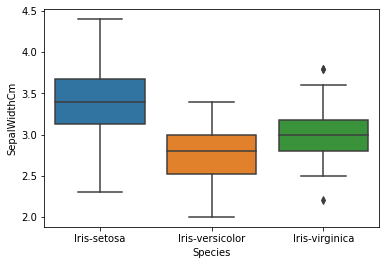

In [314]:
sns.boxplot(x=iris['Species'],y=iris['SepalWidthCm'])

In [315]:
def outlierdetection(iris):
    sorted(iris)
    Q1,Q3=np.percentile(iris,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    Upper_range=Q3+(1.5*IQR)
    return lower_range,Upper_range

In [322]:
a = iris[iris.Species == 'Iris-virginica'].SepalLengthCm
Lr,Ur=outlierdetection(a)
print(Lr,Ur)

5.274999999999999 7.475000000000001


In [323]:
iris.drop(iris.index[(iris.Species == 'Iris-virginica') & (iris.SepalLengthCm < Lr)],inplace=True)
iris.drop(iris.index[(iris.Species == 'Iris-virginica') & (iris.SepalLengthCm > Ur)],inplace=True)

In [324]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     37
Name: Species, dtype: int64

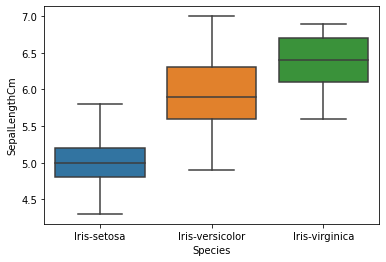

In [325]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)

In [327]:
b = iris[iris['Species'] == 'Iris-virginica'].SepalWidthCm
Lr,Ur=outlierdetection(b)
print(Lr,Ur)

2.3499999999999996 3.5500000000000007


In [330]:
iris.drop(iris.index[(iris['Species'] == 'Iris-virginica') & (iris.SepalWidthCm < Lr)],inplace=True)
iris.drop(iris.index[(iris['Species'] == 'Iris-virginica') & (iris.SepalWidthCm > Ur)],inplace=True)

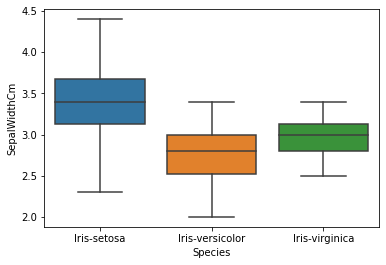

In [332]:
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)

In [348]:
c =iris[iris['Species'] == 'Iris-setosa'].PetalLengthCm
Lr,Ur=outlierdetection(c)
print(Lr,Ur)

1.2499999999999998 1.6500000000000001


In [349]:
iris.drop(iris.index[(iris['Species'] == 'Iris-setosa') & (iris.PetalLengthCm < Lr)],inplace=True)
iris.drop(iris.index[(iris['Species'] == 'Iris-setosa') & (iris.PetalLengthCm > Ur)],inplace=True)

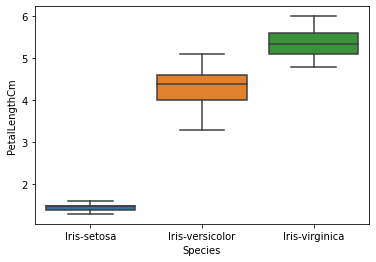

In [350]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

In [351]:
d=iris[iris['Species'] == 'Iris-versicolor'].PetalLengthCm
Lr,Ur=outlierdetection(d)
print(Lr,Ur)

3.1000000000000005 5.499999999999999


In [352]:
iris.drop(iris.index[(iris['Species'] == 'Iris-versicolor') & (iris.PetalLengthCm < Lr)],inplace=True)
iris.drop(iris.index[(iris['Species'] == 'Iris-versicolor') & (iris.PetalLengthCm > Ur)],inplace=True)

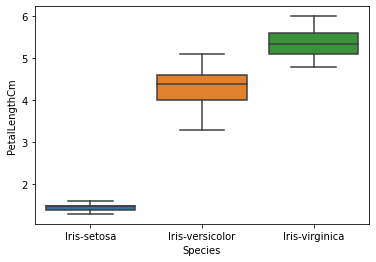

In [353]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

In [345]:
e=iris[iris['Species'] == 'Iris-setosa'].PetalWidthCm
Lr,Ur=outlierdetection(e)
print(Lr,Ur)


0.050000000000000044 0.44999999999999996


In [346]:
iris.drop(iris.index[(iris['Species'] == 'Iris-setosa') & (iris.PetalWidthCm < Lr)],inplace=True)
iris.drop(iris.index[(iris['Species'] == 'Iris-setosa') & (iris.PetalWidthCm > Ur)],inplace=True)

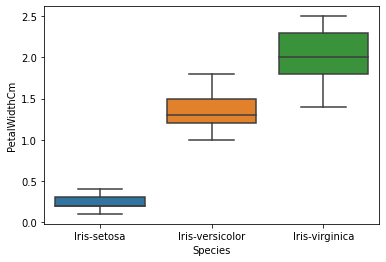

In [347]:
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

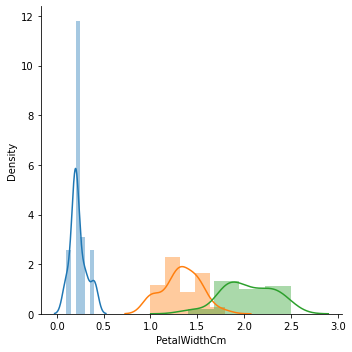

In [354]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

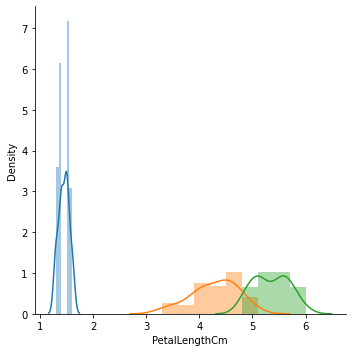

In [355]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"PetalLengthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

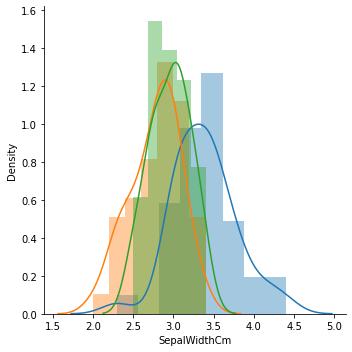

In [356]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

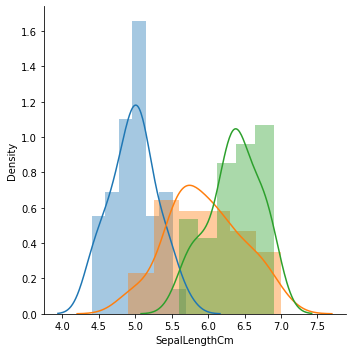

In [357]:
sns.FacetGrid(iris,hue="Species",height=5).map(sns.distplot,"SepalLengthCm")